In [1]:
import pandas as pd
from itertools import islice
from string import digits
import matplotlib.pyplot as plt
import numpy as np
import os
os.getcwd()

'/home/srijana/fresh1'

In [2]:
video_name = "DJI_0004"
path_to_data = '{0}_gt.txt'.format(video_name)
formatted_image_name = "image/{0}_{1}.jpg";

print(path_to_data)
print(formatted_image_name)

DJI_0004_gt.txt
image/{0}_{1}.jpg


In [3]:
remove_digits = str.maketrans('', '', digits)
## breaks a long list into list of provided chucks(size)
def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())

In [4]:
def xywh_to_xyxy(xywh):
    """Convert [x1 y1 w h] box format to [x1 y1 x2 y2] format."""
    if isinstance(xywh, (list, tuple)):
        # Single box given as a list of coordinates
        assert len(xywh) == 4
        x1, y1 = xywh[0], xywh[1]
        x2 = x1 + np.maximum(0., xywh[2] - 1.)
        y2 = y1 + np.maximum(0., xywh[3] - 1.)
        return (x1, y1, x2, y2)
    elif isinstance(xywh, np.ndarray):
        # Multiple boxes given as a 2D ndarray
        return np.hstack(
            (xywh[:, 0:2], xywh[:, 0:2] + np.maximum(0, xywh[:, 2:4] - 1))
        )
    else:
        raise TypeError('Argument xywh must be a list, tuple, or numpy array.')



AxesSubplot(0.125,0.125;0.775x0.755)


Index(['file_path', 'x1', 'y1', 'x2', 'y2', 'label'], dtype='object')

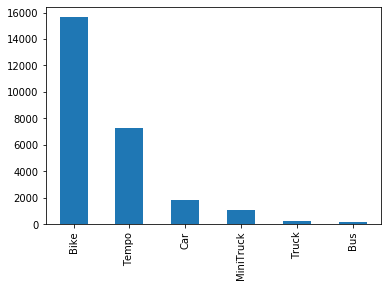

In [5]:
df = []
with open("annoted/DJI_0004_gt.txt", 'r') as f:
    for line in f:
        a_list = line.split(',')
        chunked = list(chunk(a_list[2:], 5))
        for item in chunked:
            (x1,y1,x2,y2) = xywh_to_xyxy([int(item[0]),int(item[1]),int(item[2]),int(item[3])])
        
            df.append({
                'file_path':formatted_image_name.format(video_name,a_list[0]),
                'x1':int(x1),
                'y1':int(y1),
                'x2':int(x2),
                'y2':int(y2),
                'label': item[4].strip().translate(remove_digits)
                      })
            
            
df = pd.DataFrame(df) 


#plot
print(pd.value_counts(df['label']).plot.bar())
len(df.groupby('file_path'))
df.columns


In [6]:
classes = df.groupby('label')
classes.all()

,file_path,x1,y1,x2,y2
label,,,,,
Bike,True,False,False,True,True
Bus,True,False,True,True,True
Car,True,False,False,True,True
MiniTruck,True,True,False,True,True
Tempo,True,True,False,True,True
Truck,True,True,True,True,True


In [7]:
duplicate_rows = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are :
                     file_path    x1   y1    x2   y2 label
24270  image/DJI_0004_1322.jpg  1045  434  1078  474  Bike


In [8]:
import cv2

In [9]:
def get_frame_no(file_name):
    return file_name.split("-")[1].split(".")[0]

In [10]:
from random import randrange
random_index = randrange(len(df))
image_path = df.iloc[random_index]['file_path']

print(random_index)
print(df.iloc[random_index])
print(image_path)

2550
file_path    image/DJI_0004_30.jpg
x1                            1778
y1                             368
x2                            1826
y2                             409
label                         Bike
Name: 2550, dtype: object
image/DJI_0004_30.jpg


In [11]:
df_to_plot = df[df.file_path==image_path]
df_to_plot.groupby('label')
print(len(df_to_plot))

159


In [12]:
!pip install sklearn

In [13]:
cv2.namedWindow('image', cv2.WINDOW_FULLSCREEN)
img = cv2.imread("data/"+image_path, 1)

for row in df_to_plot.itertuples():
    cv2.rectangle(img, (int(row.x1), int(row.y1)), (int(row.x2), int(row.y2)), (255, 0, 0), 2)

# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.4,random_state=1)
test,val = train_test_split(df,test_size=0.2)

print(len(train))
print(len(test))
print(len(val))

15755
21007
5252


AxesSubplot(0.125,0.125;0.775x0.755)
Index(['file_path', 'x1', 'y1', 'x2', 'y2', 'label'], dtype='object')


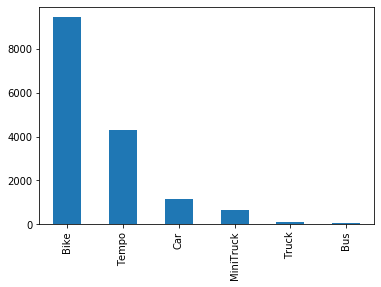

In [15]:
print(pd.value_counts(train['label']).plot.bar())
print(train.columns)

AxesSubplot(0.125,0.125;0.775x0.755)


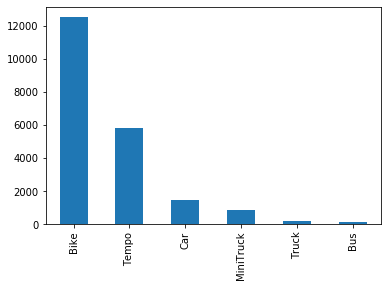

In [16]:
print(pd.value_counts(test['label']).plot.bar())


AxesSubplot(0.125,0.125;0.775x0.755)


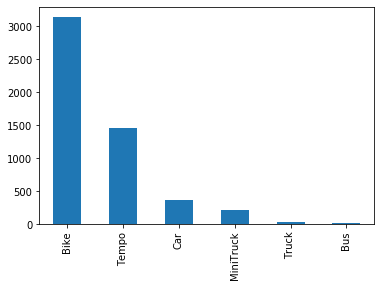

In [17]:
print(pd.value_counts(val['label']).plot.bar())


In [18]:
def rearrange(df):
    return df.reindex(columns=['file_path', 'x1', 'y1', 'x2', 'y2', 'label'])

In [19]:
rearrange(train).to_csv("new/train.csv",header=False,index=False)
rearrange(train).to_csv("new/test.csv",header=False,index=False)
rearrange(train).to_csv("new/val.csv",header=False,index=False)

In [20]:
df2 = pd.read_csv('new/1/train.csv')
print(df2)

       image/DJI_0001_219.jpg   544  816   620  870  MiniTruck
0      image/DJI_0001_183.jpg  1590  536  1626  574       Bike
1      image/DJI_0001_250.jpg  1699  188  1793  255  MiniTruck
2      image/DJI_0001_204.jpg   969  444  1020  481      Tempo
3      image/DJI_0001_152.jpg  1571  382  1627  445        Car
4      image/DJI_0001_173.jpg   691  543   736  592      Tempo
...                       ...   ...  ...   ...  ...        ...
43216  image/DJI_0001_191.jpg  1114  267  1176  320        Car
43217   image/DJI_0001_85.jpg   301  767   342  806       Bike
43218   image/DJI_0001_88.jpg  1423   46  1479   89       Bike
43219  image/DJI_0001_195.jpg  1580  556  1616  598       Bike
43220   image/DJI_0001_27.jpg   372  286   409  317       Bike

[43221 rows x 6 columns]


In [21]:
df3 = pd.read_csv('new/3n2trai/result2.csv')
print(df3)

          image/DJI_0003_0.jpg   352    0   381   25   Bike
0         image/DJI_0003_0.jpg   340    0   365   24   Bike
1         image/DJI_0003_0.jpg   331    2   363   32   Bike
2         image/DJI_0003_0.jpg   314    0   346   35   Bike
3         image/DJI_0003_0.jpg   281    0   315   35   Bike
4         image/DJI_0003_0.jpg   550  261   583  294   Bike
...                        ...   ...  ...   ...  ...    ...
16543  image/DJI_0003_5813.jpg  1566  461  1620  510  Tempo
16544  image/DJI_0003_5813.jpg  1207  752  1254  807  Tempo
16545  image/DJI_0003_5813.jpg   596  115   641  157  Tempo
16546  image/DJI_0003_5813.jpg   712   14   758   60    Car
16547  image/DJI_0003_5813.jpg   670   18   731  133    Bus

[16548 rows x 6 columns]


In [22]:
frames = [df2, df3]
result5 = pd.concat(frames, axis=1, join_axes=None,
    ignore_index=True,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    
    copy=True, sort=False)

In [23]:
df.to_csv("result5.csv")
df = pd.read_csv('result5.csv')

In [24]:
def rearrange(df):
    return df.reindex(columns=['file_path', 'x1', 'y1', 'x2', 'y2', 'label'])

In [25]:
rearrange(train).to_csv("result44.csv",header=False,index=False)

In [26]:
df3 = pd.read_csv('result45.csv')
print(df3)

         image/DJI_0004_42.jpg  1713   513  1751   549   Bike
0        image/DJI_0004_63.jpg   800   203   840   243   Bike
1      image/DJI_0004_1326.jpg   228   782   282   826  Tempo
2      image/DJI_0004_1261.jpg  1576   386  1628   436   Bike
3      image/DJI_0004_1236.jpg   241   937   304   988    Car
4      image/DJI_0004_1445.jpg   286   727   333   769  Tempo
...                        ...   ...   ...   ...   ...    ...
15749   image/DJI_0004_318.jpg  1023   821  1067   861   Bike
15750  image/DJI_0004_1252.jpg   756   244   796   291   Bike
15751    image/DJI_0004_47.jpg   947   129   980   175   Bike
15752   image/DJI_0004_374.jpg   223   981   281  1040   Bike
15753     image/DJI_0004_2.jpg  1381  1055  1417  1078   Bike

[15754 rows x 6 columns]


In [27]:
df3 = pd.read_csv('result46.csv')
print(df3)

         image/DJI_0004_42.jpg  1713   513  1751   549   Bike
0        image/DJI_0004_63.jpg   800   203   840   243   Bike
1      image/DJI_0004_1326.jpg   228   782   282   826  Tempo
2      image/DJI_0004_1261.jpg  1576   386  1628   436   Bike
3      image/DJI_0004_1236.jpg   241   937   304   988    Car
4      image/DJI_0004_1445.jpg   286   727   333   769  Tempo
...                        ...   ...   ...   ...   ...    ...
15749   image/DJI_0004_318.jpg  1023   821  1067   861   Bike
15750  image/DJI_0004_1252.jpg   756   244   796   291   Bike
15751    image/DJI_0004_47.jpg   947   129   980   175   Bike
15752   image/DJI_0004_374.jpg   223   981   281  1040   Bike
15753     image/DJI_0004_2.jpg  1381  1055  1417  1078   Bike

[15754 rows x 6 columns]


In [28]:
frames = [df2, df3]
result8 = pd.concat(frames, axis=1, join_axes=None,
    ignore_index=True,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    
    copy=True, sort=False)

In [29]:
df.to_csv("result8.csv")
df = pd.read_csv('result8.csv')

In [30]:
def rearrange(df):
    return df.reindex(columns=['file_path', 'x1', 'y1', 'x2', 'y2', 'label'])

In [31]:
rearrange(train).to_csv("final.csv",header=False,index=False)